In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
matplotlib.style.use("ggplot")

colors = sns.color_palette("husl", 6)

In [34]:
df = pd.read_json("data/data-primes-k-with-bad-hashing.json")
total_negatives = 8402298293
total_one_past = 210286406
total_positives = 187636299
total_normalized_positives = 23475688

min_size = 600 * 1024 * 8

df["rate_false_positives_in_one_past"] = df["false_positives_in_one_past"] / total_one_past
df["rate_false_positives"] = df["false_positives"] / total_negatives

df["ratio"] = df["rate_false_positives_in_one_past"] / df["rate_false_positives"]

df = df[df["size"] >= min_size]

df

,size,k,size_category,false_positives,false_positives_in_one_past,rate_false_positives_in_one_past,rate_false_positives,ratio
1,5007601,1,prime,8333624415,208546154,0.991724,0.991827,0.999897
2,5978603,1,prime,8245450780,206367576,0.981364,0.981333,1.000032
3,7137859,1,prime,8105586635,202796797,0.964384,0.964687,0.999686
4,8521907,1,prime,7880320085,197089088,0.937241,0.937877,0.999322
5,10174319,1,prime,7559333178,189398235,0.900668,0.899674,1.001104
...,...,...,...,...,...,...,...,...
99,173378771,4,prime,1073806963,26920514,0.128018,0.127799,1.001715
100,206996917,4,prime,862986010,21754836,0.103453,0.102708,1.007254
101,247133639,4,prime,719057376,18321827,0.087128,0.085579,1.018104
102,295052869,4,prime,562678258,14176713,0.067416,0.066967,1.006705


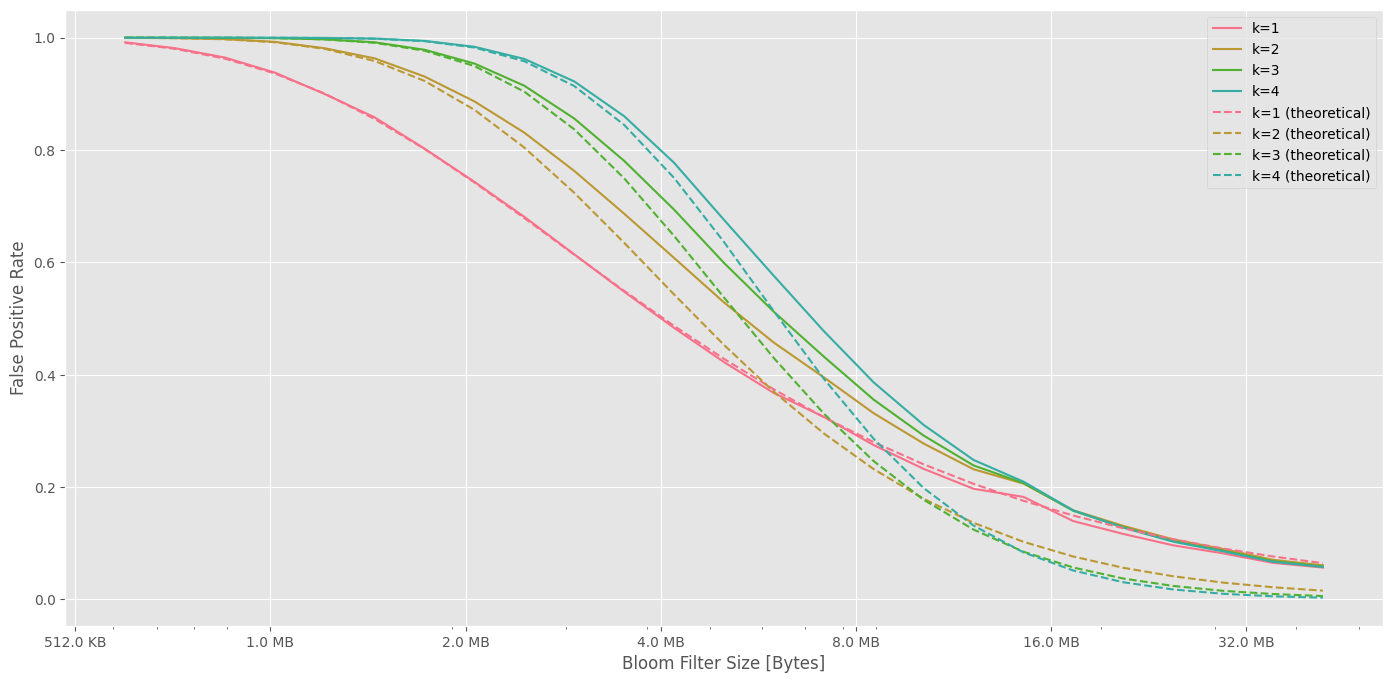

In [35]:
for k in range(1, 5):
    data = df[df["k"] == k]

    plt.plot(data["size"] / 8, data["rate_false_positives"], label=f"k={k}", color=colors[k - 1])

x = df[df["k"] == k]["size"] / 8
for k in range(1, 5):
    m = x * 8
    n = 23475688
    p = (1 - np.exp(-k / (m / n))) ** k
    plt.plot(x, p, "--", label=f"k={k} (theoretical)", color=colors[k - 1])

plt.xscale("log")

plt.xlabel("Bloom Filter Size [Bytes]")
plt.ylabel("False Positive Rate")

def bytes_to_human_readable(x, pos):
    if x < 1024:
        return "{:.0f} B".format(x)
    elif x < 1024**2:
        return "{:.1f} KB".format(x / 1024)
    else:
        return "{:.1f} MB".format(x / 1024**2)

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(bytes_to_human_readable))
plt.gca().xaxis.set_major_locator(plt.LogLocator(base=2))
plt.gcf().set_size_inches(17, 8)

plt.legend();
